In [81]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import requests
import io
import numpy as np
import re
import tweepy
import datetime as dt
try:
    import json
except ImportError:
    import simplejson as json

### Gathering the data

In [82]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [83]:
#twitter_archive['tweet_id'][1501]

In [84]:
#len(twitter_archive)

In [85]:
image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass')).content

In [86]:
image_predictions = pd.read_csv(io.StringIO(image_predictions.decode('utf-8')),sep="\t",)

In [87]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [88]:
#auth = tweepy.OAuthHandler()

In [89]:
#auth.set_access_token()

In [90]:
#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [91]:
#try:
    #api.verify_credentials()
    #print("Authentification OK")
#except:
    #print("Error")

In [92]:
#tweet_file=[]
#for tweet in range(500,1000):
    #try: 
        #tweet_status=api.get_status(id=twitter_archive['tweet_id'][tweet])
        #with open('tweet_json.txt', 'a') as f:
            #json.dump(tweet_status._json,f)
            #f.write('\n')    
    #except:
        #print(twitter_archive['tweet_id'][tweet])


In [93]:
#tweet_file=[]
#for tweet in range(1500,2000):
    #try: 
        #tweet_status=api.get_status(id=twitter_archive['tweet_id'][tweet])
        #with open('tweet_json.txt', 'a') as f:
            #json.dump(tweet_status._json,f)
            #f.write('\n')    
    #except:
        #print(twitter_archive['tweet_id'][tweet])
#f.close()


Tweets with status not found

1) 888202515573088257

2) 873697596434513921

3) 872668790621863937

4) 872261713294495745

5) 869988702071779329

6) 866816280283807744

7) 861769973181624320

8) 856602993587888130

9) 851953902622658560

10) 845459076796616705

11) 844704788403113984

12) 842892208864923648

13) 837366284874571778

14) 837012587749474308

15) 829374341691346946

16) 827228250799742977

17) 812747805718642688

18) 802247111496568832

19) 779123168116150273

20) 775096608509886464

21) 771004394259247104

22) 770743923962707968

23) 759566828574212096

24) 754011816964026368

25) 680055455951884288

I've checked for one ID to be sure that the tweet wasn't in Twitter

In [94]:
#tweet_status=api.get_status(id=888202515573088257)['id']
#try: 
    #with open('tweet_json.txt', 'a') as f:
        #json.dump(tweet_status._json,f)
        #f.write('\n')    
#except:
    #print(twitter_archive['tweet_id'][tweet])

I've created a Pandas Dataframe with the .txt Json data from Twitter.

In [95]:
dataframe = []
tweets_file=open('tweet_json.txt')
dataframe=pd.DataFrame([json.loads(line.strip())['id'],json.loads(line.strip())['favorite_count'],json.loads(line.strip())['retweet_count']] for line in tweets_file)
dataframe.columns=['tweet_id','favorite_count','retweet_count']

I wanted to check if I got the right data size. Indeed 2356 - 25= 2331

In [96]:
len(dataframe)

2331

In [97]:
final_dataframe = pd.merge(twitter_archive, dataframe,  how='left', left_on='tweet_id', right_on = 'tweet_id')

In [98]:
final_dataframe=pd.merge(final_dataframe,image_predictions,how='left',left_on='tweet_id',right_on='tweet_id')

### Data Assessment

- There are rows that don't contain either favorite or retweet counts.
- Not every observation has got image predictions.
- Favorite/Retweet counts are in float types and not int types
- Timestamp is in string type and not in datatime type
- 'img_num' isn't in integral but is in float.
Tidyness Issues:
- There are several variables for only one use ('What is the dog race'). One variable with dog race would be enough



In [99]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                23

- The source variable isn't formatted to be used, because it mixes http coding, URL address and anchoring text.
- Source: URL and text are messy in one column. I would like two columns: URL and link text

In [100]:
final_dataframe['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

- "expanded URL" should only contain one Twitter URL, and it can contain a lot of URLs. Some URLs are from a different source, but lots of URLs have got the same URL.

In [101]:
final_dataframe['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/667866724293877760/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/841077006473256960/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/767754930266464257/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/816450570814898180/photo/1,https://twitter.com/dog_rat

- Name": the extraction methodology contains errors: "a","an","quite","my","such","one","the","not"."very","all","old","life","by","space" might be only "None".

In [102]:
final_dataframe['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

- "Name": None should be a NaN value.

In [103]:
final_dataframe['name'].value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Tucker          10
Penny           10
Lola            10
Winston          9
Bo               9
the              8
Sadie            8
Toby             7
Daisy            7
Bailey           7
Buddy            7
an               7
Scout            6
Stanley          6
Jax              6
Leo              6
Bella            6
Jack             6
Milo             6
Oscar            6
Rusty            6
Dave             6
Koda             6
Sunny            5
              ... 
Lillie           1
Tove             1
Petrick          1
Monster          1
Shakespeare      1
Vince            1
Spark            1
Strider          1
Jareld           1
Pip              1
Anna             1
Sweet            1
Sully            1
Hamrick          1
Chuq             1
Zeus             1
Bilbo            1
Sweets           1
Akumi            1
Tobi             1
Mo               1
Tedrick     

- As the denominator isn't the same for every observation, the "rating_numerator" and "rating_denominator" isn't useful. We should have one variable to compare the ratings
- So the numerator/denominator should be contained by only one column.

In [104]:
final_dataframe['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

- doggo/floofer/pupper/puppo are nicknames for dogs with only one value. They are in four columns instead of 1.

In [105]:
final_dataframe['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [106]:
final_dataframe['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Quality Issues:

1) Some rows don't contain either favorite or retweet counts.

2) Not every observation has got image predictions.

3) Favorite/Retweet counts are in float types and not int types

4) timestamp is in string type and not in datetime type

5) The source variable isn't formatted to be used because it mixes HTTP coding, URL address and anchoring text.

6) "expanded URL" should only contain one Twitter URL, and it can contain a lot of URLs. Some URLs are from a different source, but lots of URLs have got the same URL.

7) "Name": the extraction methodology contains errors: "a","an","quite","my","such","one","the","not"."very","all","old","life","by","space" might be only "None".

8) "Name": None should be a NaN value.

9) 'img_num' isn't in integral but is in float.

10) As the denominator isn't the same for every observation, the "rating_numerator" and "rating_denominator" isn't useful. We should have one variable to compare the ratings


### Tidiness Issues:

1) doggo/floofer/pupper/puppo are nicknames for dogs. They are in four columns instead of 1.

2) Source: URL and text are messy in one column. I would like two columns: URL and link text

3) The numerator/denominator should be contained by only one column.

4) Create a prediction variable for p1/p2/p3



### Copy the dataframe

In [107]:
final_dataframe_copy=final_dataframe.copy()

### One column for the doggo/floofer/pupper/puppo variables
#### Define
I would like to create one column with Doggo/floofer/pupper/puppo columns and not the four ones.

In [108]:
#define the columns with doggo,floofer,pupper and puppo
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                23

Here are the values for "puppo".

In [109]:
#define the values of the "puppo" variable
final_dataframe_copy['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### Code
I used the same function as I took to get the names ((https://github.com/kdow/WeRateDogs/blob/master/wrangle_act.ipynb). I create some lists with variables to get, and I ask Pandas to get the value of the name stage if it appears in the concerned variable.

As I couldn't compare two values, I've kept only one value in the variable.

In [110]:
#code the new variable "Nickname" with "doggo"/"floofer"/"pupper"/"puppo" when there is a value in the column
doggo = final_dataframe_copy.loc[final_dataframe_copy['doggo']=="doggo"]
floofer = final_dataframe_copy.loc[final_dataframe_copy['floofer']=="floofer"]
pupper = final_dataframe_copy.loc[final_dataframe_copy['pupper']=="pupper"]
puppo = final_dataframe_copy.loc[final_dataframe_copy['puppo']=="puppo"]

# Save these locations as lists
doggo_list = doggo['tweet_id'].tolist()
floofer_list = floofer['tweet_id'].tolist()
pupper_list = pupper['tweet_id'].tolist()
puppo_list = puppo['tweet_id'].tolist()

for entry in doggo_list:
    mask = final_dataframe_copy.tweet_id == entry
    name_column = 'Nickname'
    final_dataframe_copy.loc[mask, name_column] = final_dataframe_copy[final_dataframe_copy['tweet_id']==entry]['doggo']

for entry in floofer_list:
    mask = final_dataframe_copy.tweet_id == entry
    name_column = 'Nickname'
    final_dataframe_copy.loc[mask, name_column] = final_dataframe_copy[final_dataframe_copy['tweet_id']==entry]['floofer']

for entry in pupper_list:
    mask = final_dataframe_copy.tweet_id == entry
    name_column = 'Nickname'
    final_dataframe_copy.loc[mask, name_column] = final_dataframe_copy[final_dataframe_copy['tweet_id']==entry]['pupper']

for entry in puppo_list:
    mask = final_dataframe_copy.tweet_id == entry
    name_column = 'Nickname'
    final_dataframe_copy.loc[mask, name_column] = final_dataframe_copy[final_dataframe_copy['tweet_id']==entry]['puppo']

#### Test

I've checked to see if my coding did work. It means if the value existing in the variable leads to the variable name in the "name_stage" variable.

In [111]:
#test if the value works when there is a "pupper" value in "pupper column"
final_dataframe_copy[final_dataframe_copy['pupper']=='pupper'][0:5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Nickname
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,...,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,pupper
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,...,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True,pupper
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,...,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,pupper
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,512804507.0,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,pupper
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876838120...,...,bloodhound,0.575751,True,redbone,0.240970,True,Tibetan_mastiff,0.088935,True,pupper


#### Code
After that, I asked Pandas to fill None Values by "No name stage" to compare the different name stages and the lack of nickname.

In [112]:
#code to get "No_Nickname" instead of null values
final_dataframe_copy['Nickname'].fillna("No_Nickname",inplace=True)

#### Test
All the null values of "Nickname" have been replaced by "No_Nickname"

In [113]:
#test if all the values of the "Nickname" column are OK
final_dataframe_copy['Nickname'].value_counts()

No_Nickname    1976
pupper          257
doggo            83
puppo            30
floofer          10
Name: Nickname, dtype: int64

#### Code

After that, I only needed to remove "doggo","floofer","pupper" and "puppo" columns, because I don't need them anymore.

In [114]:
#code to remove the "doggo","floofer","pupper" and "puppo" columns
final_dataframe_copy.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

#### Test
The "doggo","floofer","pupper" and "puppo" columns have been removed.

In [115]:
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
favorite_count                2331 non-null float64
retweet_count                 2331 non-null float64
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                           

### Delete rows with retweets and reply to

#### define

I aimed to delete the rows with retweets and reply to. Before that, I assessed the size of the dataframe and the number of rows with retweet status information to assess the result I've made.

In [116]:
# define the number of rows in the full dataframe
len(final_dataframe_copy)

2356

In [117]:
#define the number of rows in the retweeted_status_id
final_dataframe_copy['retweeted_status_id'].isnull().sum()

2175

In [118]:
#define the difference between the two
print(2356-181)

2175


#### Code

A simple dataframe slicing was just enough to remove these rows.

In [119]:
#### test if I've got the right rows of retweeted_status_id
final_dataframe_copy=final_dataframe_copy[final_dataframe_copy['retweeted_status_id'].isnull()]

#### Test
The "retweeted_status_id" rows have been effectively removed.

In [120]:
#### test if the rows with values in retweeted_status_id have been removed
final_dataframe_copy['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

After that, I did the same job fr "in Reply to status" variable:

1) Size assessment

2) Dataset slicing

3) Result assessment

#### Define
After that, I assessed the size of the new dataframe, and the job has been done.

In [121]:
#define the number of rows in the full
len(final_dataframe_copy)

2175

In [122]:
# define the number of rows for the variable "in_reply_to_status_id"
final_dataframe_copy['in_reply_to_status_id'].isnull().sum()

2097

#### Code

In [124]:
# Code to remove all the rows with values in the "in_reply_to_status" variable
final_dataframe_copy=final_dataframe_copy[final_dataframe_copy['in_reply_to_status_id'].isnull()]

#### Test

In [125]:
# Test if I've got the right number of rows
len(final_dataframe_copy)

2097

In [126]:
# Test if I've got values in "in_reply_to_status_id"
final_dataframe_copy['in_reply_to_status_id'].value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [127]:
# Test if the values in "retweeted_status_id" and "in_reply_to_status_id" have been removed
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
favorite_count                2090 non-null float64
retweet_count                 2090 non-null float64
jpg_url                       1971 non-null object
img_num                       1971 non-null float64
p1                            1971 no

#### Code
Now that the job is done, I wanted to remove the rows with "in_reply_to" and "retweeted_status.

In [128]:
# Code to remove the columns related to "in_reply_to" and "retweeted"
final_dataframe_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1,inplace=True)

#### Test

Final checking: the work has been done. "In_reply_to" and "retweeted" columns sets have effectively been removed.

In [129]:
# Test if the columns have been removed
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
favorite_count        2090 non-null float64
retweet_count         2090 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non

### Remove rows without retweet count info

#### Define

In [130]:
#define the number of missing values for "retweet_count"
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
favorite_count        2090 non-null float64
retweet_count         2090 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non

#### Code
As I wanted to use retweet count in my analysis, I've decided to remove rows without retweet count info. The dataframe info had already been done overhead, so I just needed to slice the dataframe to get only rows with retweet count info

In [131]:
# Code to remove the rows without "retweet_count" values
final_dataframe_copy=final_dataframe_copy[final_dataframe_copy['retweet_count'].notnull()]

#### Test
After that, I've checked if the job had been successful. Good job.

In [132]:
#Test if I've got only the rows with retweet_count values
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2090 non-null int64
timestamp             2090 non-null object
source                2090 non-null object
text                  2090 non-null object
expanded_urls         2087 non-null object
rating_numerator      2090 non-null int64
rating_denominator    2090 non-null int64
name                  2090 non-null object
favorite_count        2090 non-null float64
retweet_count         2090 non-null float64
jpg_url               1964 non-null object
img_num               1964 non-null float64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null object
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null object
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 non

### Change the data type of the variables Favorite Count, Retweet Count and Timestamp

#### Define
"favorite_count" and "retweet_count" columns are in float and we want them to be in integer.

Timestamp is in string and we want it to be in datetime.

In [133]:
#define the variable types of favorite_count, retweet_count and timestamp
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2090 non-null int64
timestamp             2090 non-null object
source                2090 non-null object
text                  2090 non-null object
expanded_urls         2087 non-null object
rating_numerator      2090 non-null int64
rating_denominator    2090 non-null int64
name                  2090 non-null object
favorite_count        2090 non-null float64
retweet_count         2090 non-null float64
jpg_url               1964 non-null object
img_num               1964 non-null float64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null object
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null object
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 non

#### Code
I wanted to get "favorite count", "retweet count" in integer, so the shown numbers wouldn't contain decimal places. The data assessment had already been done overhead. I just changed with an as_type function.

In [134]:
#code to get the favorite_count variable in integral
final_dataframe_copy['favorite_count']=final_dataframe_copy['favorite_count'].astype('int')

In [135]:
#code to get the retweet_count variable in integral
final_dataframe_copy['retweet_count']=final_dataframe_copy['retweet_count'].astype('int')

I've also transform "timestamp" variable into a datetime variable.

In [136]:
#code to get the timestamp to get the timestamp variable in integral
final_dataframe_copy['timestamp']=pd.to_datetime(final_dataframe_copy['timestamp'])

#### Test
Normally the "timestamp" variable is OK because I can use the Year function.

In [137]:
#test if the timestamp variable functions as a date
final_dataframe_copy['timestamp'].dt.year.value_counts()

2016    1052
2015     667
2017     371
Name: timestamp, dtype: int64

Now I can check if the "retweet_count" and the "favorite count" are in integers. We see that it's indeed in int64.

Second result assessment: The "timestamp" variable is indeed in datetime type.

In [138]:
# Test if retweet_count, favorie_count and timestamp variables are in the right data type
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2090 non-null int64
timestamp             2090 non-null datetime64[ns]
source                2090 non-null object
text                  2090 non-null object
expanded_urls         2087 non-null object
rating_numerator      2090 non-null int64
rating_denominator    2090 non-null int64
name                  2090 non-null object
favorite_count        2090 non-null int64
retweet_count         2090 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null float64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null object
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null object
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964

### Create a better variable for rating

#### Code
I had some problems with the "rating_numerator" and the "rating_denominator" because the results might be wrong because of the denominator differences. So I had to get only one variable with "rating_proportion".

I used the division function to get this number.

In [139]:
# Code to get the rating_proportion by dividing "rating_numerator" with "rating_denominator"
final_dataframe_copy['rating_proportion']=final_dataframe_copy['rating_numerator']/final_dataframe_copy['rating_denominator']

#### Test
Then I checked if the values are correct

In [140]:
final_dataframe_copy['rating_proportion'].value_counts()

1.200000      488
1.000000      437
1.100000      418
1.300000      283
0.900000      153
0.800000       98
0.700000       51
1.400000       38
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
0.000000        1
0.818182        1
Name: rating_proportion, dtype: int64

Some values are very difficult to interpret ("177.6" for example). So I checked the rating numerator and the rating denominator: it appears it's a valid result.

In [141]:
final_dataframe_copy[final_dataframe_copy['rating_proportion']==177.6]['rating_numerator'].value_counts()

1776    1
Name: rating_numerator, dtype: int64

In [142]:
final_dataframe_copy[final_dataframe_copy['rating_proportion']==177.6]['rating_denominator'].value_counts()

10    1
Name: rating_denominator, dtype: int64

### The source variabe: Extract URL address and anchoring text

#### Define
Right now, I need to extract the URL address and the anchoring text from the source variable. As we can see below, there is an HTML formatting we don't need and I can remove. In the same coding, I can separate URL addresses and anchoring text in two separate variables.

In [143]:
#define the valus of the "source" variable
final_dataframe_copy['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1958
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

#### Code
First, I've created a "source_url" variable in extracting the HTTP and the characters lowercase letter, number, dash and dot to get the right URL address.

In [144]:
#code to get the url_source variable
final_dataframe_copy['url_source']=final_dataframe_copy['source'].str.extract('(http[a-z1-9:\.\/]+)')

#### Test
Then I've checked if the "source_url" were correct, and it is.

In [145]:
final_dataframe_copy['url_source'].value_counts()

http://twitter.com/download/iphone              1958
http://vine.co                                    91
http://twitter.com                                31
https://about.twitter.com/products/tweetdeck      10
Name: url_source, dtype: int64

#### Code
I did the same job in anchoring text, but I needed to get the "</a" characters to extract the good anchoring text. Then I've used rstrip to remove these characters.

In [146]:
final_dataframe_copy['anchoring_text_source']=final_dataframe_copy['source'].str.extract('([A-Za-z1-9 \-]+</a>)')
final_dataframe_copy['anchoring_text_source']=final_dataframe_copy['anchoring_text_source'].str.rstrip('""</a>""')

#### Test
The anchoring_text has been well-created. I've got only the good characters.

In [147]:
final_dataframe_copy['anchoring_text_source'].value_counts()

Twitter for iPhone     1958
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: anchoring_text_source, dtype: int64

#### Code
So I could remove the "source" variable.

In [148]:
final_dataframe_copy.drop(columns=['source'],inplace=True)

#### Test
After that, I needed to check if the number of rows was OK, and it is.

In [149]:
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2090 non-null int64
timestamp                2090 non-null datetime64[ns]
text                     2090 non-null object
expanded_urls            2087 non-null object
rating_numerator         2090 non-null int64
rating_denominator       2090 non-null int64
name                     2090 non-null object
favorite_count           2090 non-null int64
retweet_count            2090 non-null int64
jpg_url                  1964 non-null object
img_num                  1964 non-null float64
p1                       1964 non-null object
p1_conf                  1964 non-null float64
p1_dog                   1964 non-null object
p2                       1964 non-null object
p2_conf                  1964 non-null float64
p2_dog                   1964 non-null object
p3                       1964 non-null object
p3_conf                  1964 non-null float64
p3_dog      

### Make Expanded URL usable

#### Define
After that, I needed to get only one Twitter URL to make it more usable. Before beginning, I would like to highlight the number of missing data (166 missing rows).

In [150]:
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2090 non-null int64
timestamp                2090 non-null datetime64[ns]
text                     2090 non-null object
expanded_urls            2087 non-null object
rating_numerator         2090 non-null int64
rating_denominator       2090 non-null int64
name                     2090 non-null object
favorite_count           2090 non-null int64
retweet_count            2090 non-null int64
jpg_url                  1964 non-null object
img_num                  1964 non-null float64
p1                       1964 non-null object
p1_conf                  1964 non-null float64
p1_dog                   1964 non-null object
p2                       1964 non-null object
p2_conf                  1964 non-null float64
p2_dog                   1964 non-null object
p3                       1964 non-null object
p3_conf                  1964 non-null float64
p3_dog      

In [151]:
final_dataframe_copy['expanded_urls'].value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                                                                2
https://twitter.com/dog_rates/status/667435689202614272/photo/1                                                                                                                                                                                                                                              1
https://twitter.com/dog_rates/status/693109034023534592/video/1                                                                                                                                                                                                                                              1
https://twitter.com/dog_rates/status/672975131468300288/photo/1                            

#### Code
As I only wanted the Twitter URL, I extracted the URL address using the Twitter domain name before the extraction request.

In [152]:
final_dataframe_copy['expanded_urls']=final_dataframe_copy['expanded_urls'].str.extract('(https://twitter.com/[\_\-0-9a-zA-Z\/]+)')

#### Test
The extraction has been well-made because the Twitter expanded URLs are in the right format.

In [153]:
final_dataframe_copy['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/714141408463036416/photo/1    1
https://twitter.com/dog_rates/status/695409464418041856/photo/1    1
https://twitter.com/dog_rates/status/869772420881756160/photo/1    1
https://twitter.com/dog_rates/status/671866342182637568/photo/1    1
https://twitter.com/dog_rates/status/711968124745228288/photo/1    1
https://twitter.com/dog_rates/status/743510151680958465/video/1    1
https://twitter.com/dog_rates/status/725842289046749185/photo/1    1
https://twitter.com/dog_rates/status/700505138482569216/photo/1    1
https://twitter.com/dog_rates/status/677687604918272002/photo/1    1
https://twitter.com/dog_rates/status/740711788199743490/photo/1    1
https://twitter.com/dog_rates/status/831309418084069378/photo/1    1
https://twitter.com/dog_rates/status/823699002998870016/photo/1    1
https://twitter.com/dog_rates/status/835172783151792128/photo/1    1
https://twitter.com/dog_rates/status/703268521220972544/photo/1    1
https://twitter.com/dog_rates/stat

As we can see here, we've got the same number of rows of "expanded_urls"

In [154]:
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2090 non-null int64
timestamp                2090 non-null datetime64[ns]
text                     2090 non-null object
expanded_urls            1993 non-null object
rating_numerator         2090 non-null int64
rating_denominator       2090 non-null int64
name                     2090 non-null object
favorite_count           2090 non-null int64
retweet_count            2090 non-null int64
jpg_url                  1964 non-null object
img_num                  1964 non-null float64
p1                       1964 non-null object
p1_conf                  1964 non-null float64
p1_dog                   1964 non-null object
p2                       1964 non-null object
p2_conf                  1964 non-null float64
p2_dog                   1964 non-null object
p3                       1964 non-null object
p3_conf                  1964 non-null float64
p3_dog      


### Name: extract a better variable

#### Define

I've observed that the "Name" variable was only extracted by "This is" (like "This is duggo"), and it leads to mistakes with "a", "an" and so on. I want to use other extractions methods to get the name:

1) 'name is'

2) 'named'

3) 'meet'

4) 'Meet'

5) 'This is'

Create a function with lambda function to get this tries in order

In [155]:
final_dataframe_copy['name'].value_counts()

None        603
a            55
Lucy         10
Charlie      10
Cooper       10
Oliver       10
Tucker        9
Penny         9
Lola          8
Winston       8
the           8
Sadie         8
Daisy         7
Toby          7
Koda          6
an            6
Bella         6
Stanley       6
Bo            6
Bailey        6
Oscar         6
Jax           6
Milo          5
Chester       5
Scout         5
Rusty         5
Dave          5
Bentley       5
Louis         5
Buddy         5
           ... 
Durg          1
Happy         1
Al            1
Obie          1
Strider       1
Tess          1
Pavlov        1
Amy           1
Anna          1
Ike           1
Sweet         1
Champ         1
Sully         1
Hamrick       1
Levi          1
Chuq          1
Zeus          1
Bilbo         1
Sweets        1
Jareld        1
Akumi         1
Mo            1
Tedrick       1
Link          1
General       1
Emmie         1
Jennifur      1
Trigger       1
Diogi         1
Karl          1
Name: name, Length: 953,

#### Code
##### My function didn't work
I've tried very hard to get these variables names, but I couldn't use more than one extraction method (the function below extracts only the last example.

In [156]:
#def name(texting):
    #if bool(re.search('name is ([A-Z]+[a-zA-Z1-9]+)', texting)):
        #naming=re.findall('name is ([a-zA-Z1-9]+)',texting)[0]
        #return naming
    #elif bool(re.search('named ([A-Z]+[a-zA-Z1-9]+)', texting)):
        #naming=re.findall('named ([A-Z]+[a-zA-Z1-9]+)',texting)[0]
        #return naming
    #elif bool(re.search('I present to you, ([A-Z]+[a-zA-Z1-9]+)', texting)):
        #naming=re.findall('I present to you, ([A-Z]+[a-zA-Z1-9]+)',texting)[0]
        #return naming
    #elif bool(re.search('Say hello to ([A-Z]+[a-zA-Z1-9]+)', texting)):
        #naming=re.findall('Say hello to ([A-Z]+[a-zA-Z1-9]+)',texting)[0]
        #return naming
    #elif bool(re.search('meet ([A-Z]+[a-zA-Z1-9]+)', texting)):
        #naming=re.findall('meet ([A-Z]+[a-zA-Z1-9]+)',texting)[0]
        #return naming
    #elif bool(re.search('Meet ([A-Z]+[a-zA-Z1-9]+)', texting)):
        #naming=re.findall('Meet ([A-Z]+[a-zA-Z1-9]+)',texting)[0]
        #return naming
    #elif bool(re.search('This is ([A-Z]+[a-zA-Z1-9]+)', texting)):
        #naming=re.findall('This is ([A-Z]+[a-zA-Z1-9]+)',texting)[0]
        #return naming
    #else:
        #return None
        #print(texting)

#final_dataframe_copy['right_name']=final_dataframe_copy['text'].apply(lambda x:name(x))

So I used another project to fill up my variable (https://github.com/kdow/WeRateDogs/blob/master/wrangle_act.ipynb). Because I thought "named" and "name is" was more important than "This is". I also added some other values to make other things interesting.

In [157]:
name_named = final_dataframe_copy.loc[final_dataframe_copy['text'].str.contains('named',regex=True)]
name_name_is = final_dataframe_copy.loc[final_dataframe_copy['text'].str.contains('name is')]
name_present_to_you = final_dataframe_copy.loc[final_dataframe_copy['text'].str.contains('I present to you, ')]
name_say_hello_to = final_dataframe_copy.loc[final_dataframe_copy['text'].str.contains('Say hello to [A-Z]+')]
name_meet = final_dataframe_copy.loc[final_dataframe_copy['text'].str.contains('meet [A-Z]+',regex=True)]
name_Meet = final_dataframe_copy.loc[final_dataframe_copy['text'].str.contains('Meet [A-Z]+', regex=True)]


# Save these locations as lists
name_named_list = name_named['text'].tolist()
name_name_is_list = name_name_is['text'].tolist()
name_present_to_you_list = name_present_to_you['text'].tolist()
name_say_hello_to_list = name_say_hello_to['text'].tolist()
name_meet_list=name_meet['text'].tolist()
name_Meet_list=name_Meet['text'].tolist()



for entry in name_named_list:
    mask = final_dataframe_copy.text == entry
    name_column = 'name'
    final_dataframe_copy.loc[mask, name_column] = re.findall(r"named\s([A-Z]+[a-zA-Z1-9]+)", entry)

for entry in name_name_is_list:
    mask = final_dataframe_copy.text == entry
    name_column = 'name'
    final_dataframe_copy.loc[mask, name_column] = re.findall(r"name is\s([A-Z]+[a-zA-Z1-9]+)", entry)
    
for entry in name_present_to_you_list:
    mask = final_dataframe_copy.text == entry
    name_column = 'name'
    final_dataframe_copy.loc[mask, name_column] = re.findall(r'I present to you, ([A-Z]+[a-zA-Z1-9]+)', entry)

for entry in name_say_hello_to_list:
    mask = final_dataframe_copy.text == entry
    name_column = 'name'
    final_dataframe_copy.loc[mask, name_column] = re.findall(r'Say hello to ([A-Z]+[a-zA-Z1-9]+)', entry)

for entry in name_meet_list:
    mask = final_dataframe_copy.text == entry
    name_column = 'name'
    final_dataframe_copy.loc[mask, name_column] = re.findall(r'meet ([A-Z]+[a-zA-Z1-9]+)', entry)
    
for entry in name_Meet_list:
    mask = final_dataframe_copy.text == entry
    name_column = 'name'
    final_dataframe_copy.loc[mask, name_column] = re.findall(r'Meet ([A-Z]+[a-zA-Z1-9]+)', entry)

    



I used the same function after that to remove the lowercase variables

In [158]:
not_named_to_replace = final_dataframe_copy.loc[(final_dataframe_copy['name'].str.islower())]
not_named_to_replace_list = not_named_to_replace['text'].tolist()
for entry in not_named_to_replace_list:
    mask = final_dataframe_copy.text == entry
    name_column = 'name'
    final_dataframe_copy.loc[mask, name_column] = "None" 

It wasn't so great overall, but it was the best means to get the most of these names (745 names)

In [159]:
#### Test
final_dataframe_copy['name'].value_counts()

None        676
Charlie      10
Cooper       10
Lucy         10
Oliver       10
Penny         9
Tucker        9
Lola          8
Sadie         8
Winston       8
Daisy         7
Toby          7
Bo            6
Bella         6
Oscar         6
Jax           6
Bailey        6
Koda          6
Stanley       6
Dave          5
Zoey          5
Milo          5
Scout         5
Leo           5
Bentley       5
Louis         5
Buddy         5
Chester       5
Rusty         5
Gary          4
           ... 
Barney        1
Moreton       1
Kial          1
Kaia          1
Lupe          1
Stewie        1
Gilbert       1
Craig         1
Tobi          1
General       1
Shawwn        1
Pherb         1
Alphred       1
Jennifur      1
Trigger       1
Diogi         1
Amy           1
Tess          1
Strider       1
Jarod         1
Spark         1
Vince         1
Nollie        1
Ulysses       1
Laika         1
Brian         1
Ferg          1
Taco          1
Fizz          1
Karl          1
Name: name, Length: 953,

Some names couldn't be extracted automatically, and it wasn't worth extracting them manually. Some tweets have got two dog names. The try/except formula hasn't worked at all, apart from the "This is". I have to try it with a simple observation.

### Remove "None" values in Name

#### Define

In [162]:
#I wanted to know how many rows were to remove
final_dataframe_copy[final_dataframe_copy['name']=="None"]['name'].count()

676

#### Code
As the data assessment went, I wanted to get a None value because I don't intend to compare if the dogs have names or not (and this wouldn't be a right comparison basis).

In [163]:
#I replaced "None" values with a null value
final_dataframe_copy.replace({"None":None},inplace=True)

#### Test

In [164]:
# There isn't any "None" name in the "name" variable
final_dataframe_copy[final_dataframe_copy['name']=="None"]['name'].count()

0

### Create a dataframe with image predictions

#### Define
As it was written in the tidiness assessment, some rows lack image predictions. So I wanted to create another dataframe to get only the rows with image predictions.

In [173]:
# define the number of values for p1/p2/p3 rows
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2090 non-null int64
timestamp                2090 non-null datetime64[ns]
text                     2090 non-null object
expanded_urls            1993 non-null object
rating_numerator         2090 non-null int64
rating_denominator       2090 non-null int64
name                     1414 non-null object
favorite_count           2090 non-null int64
retweet_count            2090 non-null int64
jpg_url                  1964 non-null object
img_num                  1964 non-null float64
p1                       1964 non-null object
p1_conf                  1964 non-null float64
p1_dog                   1964 non-null object
p2                       1964 non-null object
p2_conf                  1964 non-null float64
p2_dog                   1964 non-null object
p3                       1964 non-null object
p3_conf                  1964 non-null float64
p3_dog      

To do it, I needed to slice the dataframe and remove the rows with "p1" null, and the other image predictions variables have got exactly the same rows problems.

#### Code

In [170]:
#code to create a dataframe with only image predictions data
image_pred_dataframe=final_dataframe_copy[final_dataframe_copy['p1'].notnull()].copy()

#### Test
Now I can see that every variable has got the same missing data.

In [171]:
#check: the data without image predictions have been removed
image_pred_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1964 non-null int64
timestamp                1964 non-null datetime64[ns]
text                     1964 non-null object
expanded_urls            1964 non-null object
rating_numerator         1964 non-null int64
rating_denominator       1964 non-null int64
name                     1372 non-null object
favorite_count           1964 non-null int64
retweet_count            1964 non-null int64
jpg_url                  1964 non-null object
img_num                  1964 non-null float64
p1                       1964 non-null object
p1_conf                  1964 non-null float64
p1_dog                   1964 non-null object
p2                       1964 non-null object
p2_conf                  1964 non-null float64
p2_dog                   1964 non-null object
p3                       1964 non-null object
p3_conf                  1964 non-null float64
p3_dog      

### Get img_num into int

#### Define

In [172]:
#Define the 'img_num' datatype as float
image_pred_dataframe['img_num'].dtype

dtype('float64')

#### Code
Right now, I can change the variable img_num float type into the integer type.

In [174]:
#change of the datatype of 'img_num'
image_pred_dataframe['img_num']=image_pred_dataframe['img_num'].astype('int')

#### Test

I've checked if the changes have been made and Yes, "img_num" is in integer datatype.

In [175]:
# test the datatype as integer
image_pred_dataframe['img_num'].dtype

dtype('int64')

### P1/P2/P3

#### Define
The last thing to do was to get only one variable with image predictions. The P1 variable can contain No-Dog data ((as 'seat bel'). So I had to check if P1/P2/P3 contained a dog_type before getting this in a new variable

In [80]:
#define the errors in 'p1' values (not dog race)
image_pred_dataframe['p1'].value_counts()

golden_retriever             137
Labrador_retriever            92
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       39
Pomeranian                    38
toy_poodle                    36
malamute                      29
cocker_spaniel                27
French_bulldog                25
Chesapeake_Bay_retriever      23
seat_belt                     21
miniature_pinscher            21
Siberian_husky                20
German_shepherd               20
Eskimo_dog                    18
Shetland_sheepdog             18
Staffordshire_bullterrier     18
Maltese_dog                   18
teddy                         17
Cardigan                      17
Shih-Tzu                      17
beagle                        17
Rottweiler                    16
Italian_greyhound             16
kuvasz                        15
Lakeland_terrier              15
web_site                      14
          

In [81]:
# define the type of 'p1_dog'
image_pred_dataframe['p1_dog'].value_counts()

True     1456
False     508
Name: p1_dog, dtype: int64

#### Code

To do it, I began with p3 to see if it was a dog, to make a list, and to change the value if it was a dog, then p2 and then p1 to get only the p1 value if it was a dog.

In [82]:
#Code the race dogs in order I can get p1 values, then p2 values, and then p3 values if the previous p isn't a dog.
nicknames_p3 = image_pred_dataframe.loc[image_pred_dataframe['p3_dog']==True]
nicknames_p2 = image_pred_dataframe.loc[image_pred_dataframe['p2_dog']==True]
nicknames_p1 = image_pred_dataframe.loc[image_pred_dataframe['p1_dog']==True]

# Save these locations as lists
nicknames_p3_list = nicknames_p3['tweet_id'].tolist()
nicknames_p2_list = nicknames_p2['tweet_id'].tolist()
nicknames_p1_list = nicknames_p1['tweet_id'].tolist()

for entry in nicknames_p3_list:
    mask = image_pred_dataframe.tweet_id == entry
    name_column = 'race_dog'
    image_pred_dataframe.loc[mask, name_column] = image_pred_dataframe[image_pred_dataframe['tweet_id']==entry]['p3']

for entry in nicknames_p2_list:
    mask = image_pred_dataframe.tweet_id == entry
    name_column = 'race_dog'
    image_pred_dataframe.loc[mask, name_column] = image_pred_dataframe[image_pred_dataframe['tweet_id']==entry]['p2']

for entry in nicknames_p1_list:
    mask = image_pred_dataframe.tweet_id == entry
    name_column = 'race_dog'
    image_pred_dataframe.loc[mask, name_column] = image_pred_dataframe[image_pred_dataframe['tweet_id']==entry]['p1']

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Test
Then I've checked if the function did it well, and yes, all the p1 dog-type have been kept into the race_dog variable.

In [85]:
image_pred_dataframe[image_pred_dataframe['race_dog']==image_pred_dataframe['p1']]['p1'].count()

1456

#### Code
I've kept the image predictions variables in case other people would need it. But now that the job has been done, I need to remove the image prediction columns from the main database.

In [86]:
# code to remove the p1/p2/p3 columns set from the final_dataframe_copy
final_dataframe_copy.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','img_num'],inplace=True)

These changes have been well-made.

In [87]:
final_dataframe_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2090 non-null int64
timestamp             2090 non-null datetime64[ns]
text                  2090 non-null object
expanded_urls         2087 non-null object
rating_numerator      2090 non-null int64
rating_denominator    2090 non-null int64
name                  1414 non-null object
favorite_count        2090 non-null int64
retweet_count         2090 non-null int64
jpg_url               1964 non-null object
Nickname              2090 non-null object
rating_proportion     2090 non-null float64
url_source            2090 non-null object
expanded_urls2        1993 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 244.9+ KB


### Saving of the dataframes

Then I had to save my dataframe. I've also saved the two dataframes into the asked file and another image-pred file

In [88]:
final_dataframe_copy.to_csv('twitter_archive_master.csv')
image_pred_dataframe.to_csv('twitter_archive_pred_master.csv')

## Data visualization

We can see that there is a small association between favorite count and proportion rating. But there were more excessive ratings when the favorite count was lower than 10'000.

(0, 2)

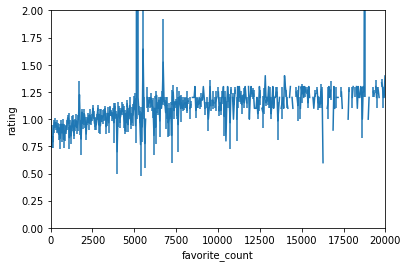

In [89]:
bin_size = 50
xbin_edges = np.arange(0.5, final_dataframe_copy['favorite_count'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(final_dataframe_copy['favorite_count'], xbin_edges, right = False, include_lowest = True)
y_means = final_dataframe_copy['rating_proportion'].groupby(data_xbins).mean()
y_sems = final_dataframe_copy['rating_proportion'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('favorite_count')
plt.ylabel('rating')
plt.xlim(0,20000)
plt.ylim(0,2)

Same observation right now

(0, 2)

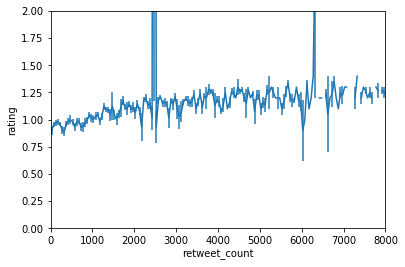

In [90]:
bin_size = 50
xbin_edges = np.arange(0.5, final_dataframe_copy['retweet_count'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(final_dataframe_copy['retweet_count'], xbin_edges, right = False, include_lowest = True)
y_means = final_dataframe_copy['rating_proportion'].groupby(data_xbins).mean()
y_sems = final_dataframe_copy['rating_proportion'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('retweet_count')
plt.ylabel('rating')
plt.xlim(0,8000)
plt.ylim(0,2)

The dog races the most appreciate might be the clumber, the Bouvier des Flandres and Pomeranian if we refer to the rating in WeRateDogs. 

The dog races the least appreciate might be the Japanese Spaniel, the soft coated wheaten terrier, and the Scotch terrier if we refer to the rating of WeRateDogs.

In [91]:
image_pred_dataframe.groupby('race_dog')['rating_proportion'].mean().sort_values(ascending=False)

race_dog
clumber                        2.700000
Bouvier_des_Flandres           1.300000
Pomeranian                     1.253659
Saluki                         1.250000
briard                         1.233333
Tibetan_mastiff                1.225000
Border_terrier                 1.214286
standard_schnauzer             1.200000
silky_terrier                  1.200000
Gordon_setter                  1.175000
Irish_setter                   1.175000
Samoyed                        1.173171
golden_retriever               1.167607
kuvasz                         1.152941
Australian_terrier             1.150000
wire-haired_fox_terrier        1.150000
Great_Pyrenees                 1.146667
Pembroke                       1.142553
chow                           1.141667
Eskimo_dog                     1.140909
cocker_spaniel                 1.133333
Doberman                       1.133333
Norfolk_terrier                1.133333
Leonberg                       1.133333
Irish_water_spaniel            

As the other mentioned dog races are in size 1, I would say that the "Pomeranian" is the dog race the most appreciate and "soft-coated_wheaten_terrier" the least appreciated.

In [92]:
len(image_pred_dataframe[image_pred_dataframe['race_dog']=="Pomeranian"])

41

In [93]:
len(image_pred_dataframe[image_pred_dataframe['race_dog']=="soft-coated_wheaten_terrier"])

14

Interesting thing, "puppo" nickname was 0.12 better than "pupper".

In [94]:
final_dataframe_copy.groupby('Nickname')['rating_proportion'].mean().sort_values(ascending=True)

Nickname
pupper         1.081739
No_Nickname    1.179421
floofer        1.180000
doggo          1.183099
puppo          1.204167
Name: rating_proportion, dtype: float64

As we see it on the bar chart, there isn't that much difference.

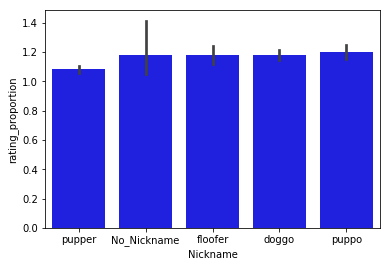

In [96]:
order=['pupper','No_Nickname','floofer','doggo','puppo']
sb.barplot(data=final_dataframe_copy,x="Nickname",y="rating_proportion",color='blue',order=order)

But there is a much bigger difference for the favorite count (more than 11'000 favorites/tweet between "pupper" and "puppo".

In [228]:
final_dataframe_copy.groupby('Nickname')['favorite_count'].mean().sort_values(ascending=True)

Nickname
pupper          6374.580392
No Nickname     7310.292434
floofer        10802.400000
doggo          15764.900000
puppo          17772.200000
Name: favorite_count, dtype: float64

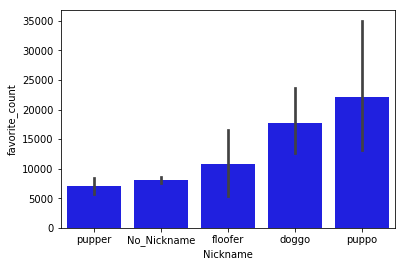

In [97]:
order=['pupper','No_Nickname','floofer','doggo','puppo']
sb.barplot(data=final_dataframe_copy,x="Nickname",y="favorite_count",color='blue',order=order)

For the retweet count also, "puppo" nickname is much more appreciated than "puppo" (more than 3'800 retweet/tweet, nearly three times).

In [98]:
final_dataframe_copy.groupby('Nickname')['retweet_count'].mean().sort_values(ascending=True)

Nickname
pupper         2292.060870
No_Nickname    2384.966382
floofer        3631.000000
doggo          6116.633803
puppo          6484.166667
Name: retweet_count, dtype: float64

And this is also clear in the bar plots.

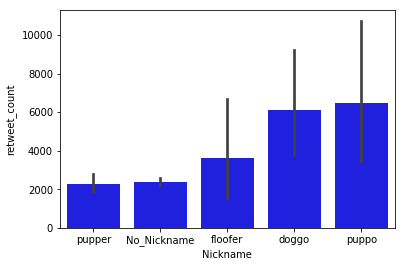

In [99]:
order=['pupper','No_Nickname','floofer','doggo','puppo']
sb.barplot(data=final_dataframe_copy,x="Nickname",y="retweet_count",color='blue',order=order)

In [91]:
final_dataframe_copy.groupby(final_dataframe_copy.timestamp.dt.dayofweek)['rating_proportion'].mean()

timestamp
0    1.552354
1    1.072436
2    1.047137
3    1.094178
4    1.077712
5    1.064925
6    1.202985
Name: rating_proportion, dtype: float64

([<matplotlib.axis.XTick at 0x7f7058f2fef0>,
 <a list of 7 Text xticklabel objects>)

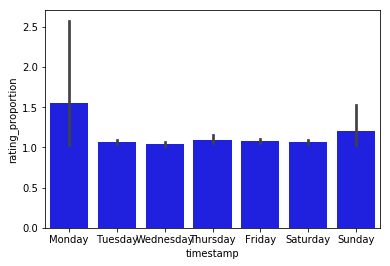

In [92]:
sb.barplot(x=final_dataframe_copy.timestamp.dt.dayofweek,y=final_dataframe_copy["rating_proportion"],color='blue')
plt.xticks((0,1,2,3,4,5,6), ('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'))

The differences aren't that big if we take the day of the week.

In [100]:
final_dataframe_copy.groupby(final_dataframe_copy.timestamp.dt.dayofweek)['favorite_count'].mean()

timestamp
0    8101.022727
1    8569.240385
2    9411.737013
3    7716.917808
4    8253.448276
5    8781.850746
6    8304.839552
Name: favorite_count, dtype: float64

Thursday seems slightly less interesting to get favorites, and Wednesday seems slightly more interesting. But it hasn't any confidence interval.

([<matplotlib.axis.XTick at 0x7fca3a39d470>,
 <a list of 7 Text xticklabel objects>)

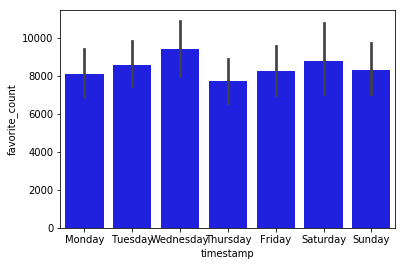

In [120]:
sb.barplot(x=final_dataframe_copy.timestamp.dt.dayofweek,y=final_dataframe_copy["favorite_count"],color='blue')
plt.xticks((0,1,2,3,4,5,6), ('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'))

In the means and the bar plot, there isn't any difference of retweet count by day of the week, either.

In [103]:
final_dataframe_copy.groupby(final_dataframe_copy.timestamp.dt.dayofweek)['retweet_count'].mean()

timestamp
0    2444.659091
1    2488.964744
2    2928.259740
3    2289.270548
4    2565.006897
5    2743.701493
6    2434.287313
Name: retweet_count, dtype: float64

([<matplotlib.axis.XTick at 0x7fca3a696eb8>,
 <a list of 7 Text xticklabel objects>)

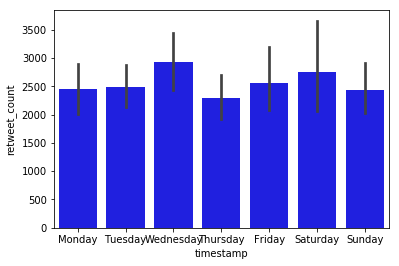

In [104]:
sb.barplot(x=final_dataframe_copy.timestamp.dt.dayofweek,y=final_dataframe_copy["retweet_count"],color='blue')
plt.xticks((0,1,2,3,4,5,6), ('Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'))

In [105]:
final_dataframe_copy.groupby(final_dataframe_copy.timestamp.dt.month)['rating_proportion'].mean()

timestamp
1     1.077922
2     1.085106
3     1.101099
4     1.125490
5     1.168627
6     1.114001
7     2.358219
8     1.103175
9     1.147059
10    1.263889
11    1.056571
12    1.000300
Name: rating_proportion, dtype: float64

([<matplotlib.axis.XTick at 0x7fca3a4d7668>,
 <a list of 12 Text xticklabel objects>)

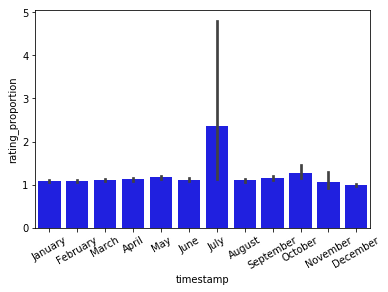

In [116]:
sb.barplot(x=final_dataframe_copy.timestamp.dt.month,y=final_dataframe_copy["rating_proportion"],color='blue')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['January','February','March','April','May','June','July','August','September','October','November','December'],rotation=30)

There are many more favorites by a tweet from May to July.

In [108]:
final_dataframe_copy.groupby(final_dataframe_copy.timestamp.dt.month)['favorite_count'].mean()

timestamp
1      7752.996032
2      8429.101064
3      8276.456044
4     11535.931373
5     15284.931373
6     15661.978102
7     15293.801370
8     10263.174603
9     10202.632353
10    12924.500000
11     3092.711429
12     4994.448598
Name: favorite_count, dtype: float64

([<matplotlib.axis.XTick at 0x7fca3a38eba8>,
 <a list of 12 Text xticklabel objects>)

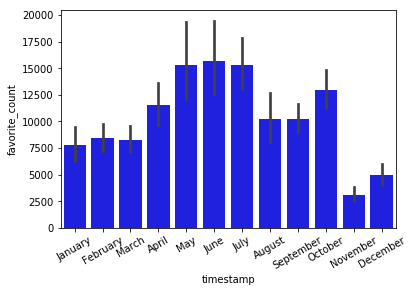

In [117]:
sb.barplot(x=final_dataframe_copy.timestamp.dt.month,y=final_dataframe_copy["favorite_count"],color='blue')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['January','February','March','April','May','June','July','August','September','October','November','December'],rotation=30)

In [110]:
final_dataframe_copy.groupby(final_dataframe_copy.timestamp.dt.month)['retweet_count'].mean()

timestamp
1     2603.083333
2     2234.122340
3     2318.692308
4     2995.774510
5     4135.490196
6     4605.343066
7     3895.342466
8     3332.619048
9     3195.882353
10    4177.013889
11    1080.280000
12    1887.495327
Name: retweet_count, dtype: float64

([<matplotlib.axis.XTick at 0x7fca3a2cd5f8>,
 <a list of 12 Text xticklabel objects>)

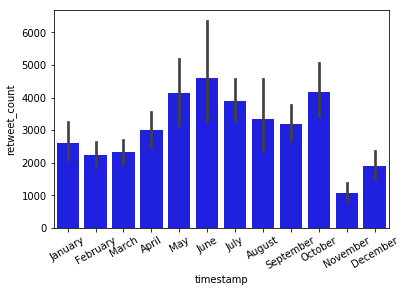

In [121]:
sb.barplot(x=final_dataframe_copy.timestamp.dt.month,y=final_dataframe_copy["retweet_count"],color='blue')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['January','February','March','April','May','June','July','August','September','October','November','December'],rotation=30)